In [78]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import df2img
import dataframe_image as dfi

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
# Creating a function to run corrwith and gerenate recommendations based on input item.
# Code adapted from https://practicaldatascience.co.uk/data-science/how-to-create-a-simple-product-recommender-system-in-pandas
def get_recommendations(df, item):
    """Generate a set of product recommendations using item-based collaborative filtering.
    
    Args:
        df (dataframe): Pandas dataframe containing matrix of items purchased.
        item (string): Column name for target item. 
        
    Returns: 
        recommendations (dataframe): Pandas dataframe containing product recommendations. 
    """
    
    recommendations = df.corrwith(df[item])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    return recommendations[1:6]

### Looking at base recommendation system for retail orders that uses collaborative filtering to create recommendations. This, however, only uses order ID and not customer ID so it will not take into account customers that make multiple orders which should improve the recommendations based on the growing body of information of customer preferences. I will use this to compare against my custom model where I have included a way of including customer IDs and their preferences.

In [81]:
# Reading in retail DF
base_retail = pd.read_csv('../data/base_retail_no_email.csv', low_memory=False)
base_retail

,name,qty_ordered,order_id,store_id
0,62% Dark Milk Chocolate + Fleur de Sel Sea Salt,1.0,37,1.0
1,Dark Chocolate + Peanut Butter Bar,1.0,37,1.0
2,White Chocolate Bar,1.0,38,1.0
3,"70% Cortés, Honduras Dark Chocolate Bar",1.0,38,1.0
4,Love Bites,1.0,39,1.0
...,...,...,...,...
278272,White Chocolate Bar,1.0,#1020,1.0
278273,White Chocolate Nibble Bar,1.0,#1020,1.0
278274,Dark Chocolate + Malted Milk CollaBARation Bar,1.0,#1019,1.0
278275,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",1.0,#1018,1.0


In [82]:
# Looking at top retail products by sales
base_retail_top_15_plot = base_retail.groupby('name').agg(
    order_id=('order_id', 'nunique'),
    qty_ordered=('qty_ordered', 'sum')
).sort_values(by='qty_ordered', ascending=False).head(15)
    
base_retail_top_15_plot

,order_id,qty_ordered
name,,
62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,12825,25255.0
"77% Davao, Philippines Dark Chocolate Bar",9913,23128.0
"72% Mababu, Tanzania Dark Chocolate Bar",11314,21875.0
"72% Zamora, Amazonia Dark Chocolate Bar",9784,18666.0
"70% San Jose Del Tambo, Ecuador Dark Chocolate Bar",8954,16422.0
Dark Chocolate + Peanut Butter Bar,9315,15594.0
Coconut Milk Chocolate Bar,7382,15485.0
"70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar",7396,14261.0
Chocolate Covered Malt Balls,8394,13759.0


In [83]:
# Resetting index to plot 
base_retail_top_15_plot = base_retail_top_15_plot.reset_index()

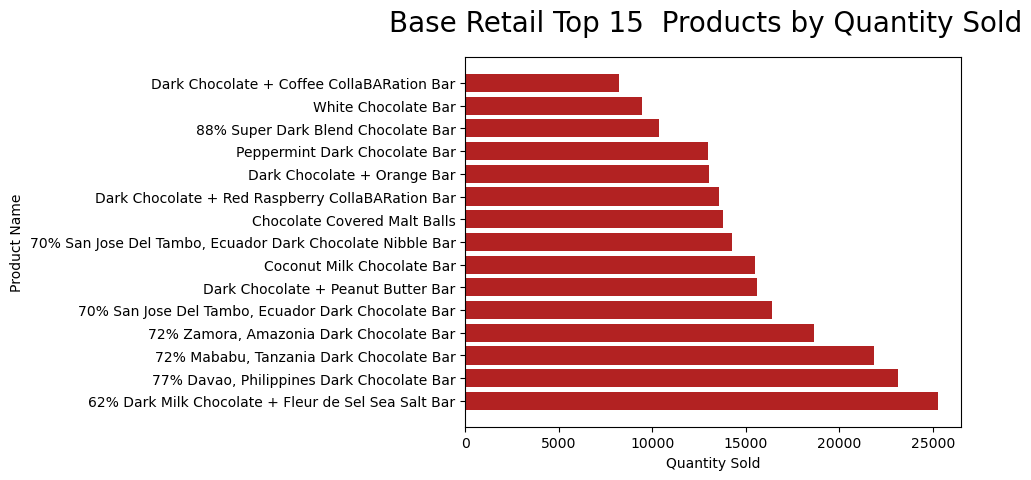

In [84]:
# Plotting top 15 products and # sold
plt.barh(y = base_retail_top_15_plot['name'], width = base_retail_top_15_plot['qty_ordered'], color = 'firebrick')
plt.suptitle('Base Retail Top 15  Products by Quantity Sold', fontsize=20)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name');

In [85]:
# Creating pivot table for recommender system
base_retail = base_retail.pivot_table(index='order_id', columns=['name'], values='qty_ordered').fillna(0)
base_retail.head()

name,Askinosie Single Origin Box,"Peppermint Bark, Large Box","Peppermint Bark, Small Tin",(White) Chocolate Covered Strawberry Bar,100% Dark Chocolate Zero Sugar Bar,52% Dark Milk Chocolate + Goats Milk,52% Dark Milk Chocolate + Goats Milk Mini Bar,52% Dark Milk Chocolate + Goat’s Milk,52% Dark Milk Chocolate + Goat’s Milk Mini Bar,60% Dark Chocolate + Peanut Butter Bar,62% Dark Milk Chocolate + Fleur de Sel Sea Salt,62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,63% Dark Chocolate + Crushed Almonds & Vanilla,63% Dark Chocolate + Crushed Almonds & Vanilla Mini Bar,68% Dark Chocolate,68% Dark Chocolate Mini Bar,"68% Zamora, Amazonia Dark Chocolate Nibble Bar",70% Barrel-Aged Dark Chocolate Bar,"70% CortÃ©s, Honduras Dark Chocolate Bar","70% Cortés, Honduras Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","72% Mababu, Tanzania Dark Chocolate Bar","72% Zamora, Amazonia Dark Chocolate Bar","75% Ambanja, Madagascar Dark Chocolate Bar AKA The Zeke Bar","75% Ambanja, Madagascar Dark Chocolate Bar AKA The Zeke Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA The Zeke Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA “The Zeke Bar”","76% Chinchipe, Ecuador Dark Chocolate Bar AKA The Zeke Bar","76% Chinchipe, Ecuador Dark Chocolate Bar— AKA “The Zeke Bar”","77% Davao, Philippines Dark Chocolate Bar",77% Whiskey Dark Chocolate,88% Super Dark Blend Chocolate Bar,88% Super Dark Blend Chocolate Bar,A Lapsed Anarchist's Approach to Being a Better Leader,A Lapsed Anarchist's Approach to Building a Great Business,A Lapsed Anarchist's Approach to Managing Ourselves,A Lapsed Anarchist's Approach to the Power of Beliefs in Business,A Product of Change Collection,A Product of Change Tableya,A Product of Change Collection,A Year of Chocolate Collection,Askinoisie Digital Gift Card - $100,Askinoisie Digital Gift Card - $25,Askinoisie Digital Gift Card - $50,Askinoisie Digital Gift Card - $75,Askinosie Baggu Tote,Askinosie Bean-to-Bar Poster,Askinosie Chocolate Embroidered Cap,Askinosie Chocolate Embroidered Cap - Chocolate,Askinosie Chocolate Gift Card,Askinosie Chocolate Gift Card - $10.00,Askinosie Chocolate Gift Card - $50.00,Askinosie Chocolate Sticker,Askinosie Chocolate Trucker Hat,Askinosie Digital Gift Card,Askinosie Digital Gift Card - $25,Askinosie Digital Gift Card - $50,Askinosie Digital Gift Card - $75,Askinosie Single Origin Box,Askinosie Single Origin Box - Congratulations,Askinosie Single Origin Box - I Ate All Your Chocolate So Here's More,Askinosie Single Origin Box - I Heart You,Askinosie Single Origin Box - None,"Askinosie Single Origin Box - You're Right, I'm Wrong",Askinosie notNeutral Mug,Askinosie x Target Dark Chocolate,Askinosie x Target Dark Chocolate + Crushed Almonds & Vanilla,Askinosie x Target Dark Milk Chocolate + Goats Milk,Askinosie x Target Dark Milk Chocolate + Goat’s Milk,BULK Broken Bars,BULK Broken Bars: Dark Chocolate + Coconut Sugar & Toasted Coconut,BULK Cocoa Nibs,BULK Cocoa Nibs - kilo,BULK Cocoa Powder,BULK Cocoa Powder - kilo,BULK Dark Chocolate Broken Bars,BULK Dark Chocolate Broken Bars - kilo,BULK Dark Milk Chocolate Broken Bars,BULK Dark Milk Chocolate Broken Bars - kilo,BULK Natural Cocoa Powder,BULK Peppermint Bark,BULK Roasted Cocoa Nibs,BULK White Chocolate Broken Bars - kilo,Baker's Best Friend Collection,Bestsellers: Chocolate Tasting Kit,Box O' (Mini) Chocolates,Broken (White) Chocolate Covered Strawberry Bar,Broken 100% Bar,Broken 100% Zero Sugar Dark Chocolate Bar,Broken 62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,Broken 70% Barrel-Aged Dark Chocolate Bar,"Broken 70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","Broken 70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","Broken 72% Mababu, Tanzania Dark Chocolate Bar","Broken 72% Zamora, Amazonia Dark Chocolate Bar","Broken 77% Davao, Philippines Dark Chocolate Bar",Broken 88% Super Dark Blend Chocolate Bar,Broken 

### Looking at product counts and reccomendations for retail dataframe that has been cleared of all orders without an email address. Email addresses were anonymized and if a customer had a subsequent order the identity was maintained in order to improve the pereformance of teh recommender system.

In [86]:
# Testing recommender system
get_recommendations(base_retail, 'Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar')

,name,correlation
163,Dark Chocolate + Coffee CollaBARation Bar,0.141643
167,Dark Chocolate + Malted Milk CollaBARation Bar,0.113294
165,Dark Chocolate + Crunchy Sugar Crystals & Vani...,0.102892
171,Dark Chocolate + Red Raspberry CollaBARation Bar,0.099987
159,Dark Chocolate + Avocado & Rosemary CollaBARat...,0.068630


In [87]:
# Testing recommender system
get_recommendations(base_retail, 'Chocolate Covered Malt Balls')

,name,correlation
168,Dark Chocolate + Malted Milk CollaBARation Bar,0.082002
167,Dark Chocolate + Malted Milk CollaBARation Bar,0.074380
338,"Peppermint Bark, Small Tin",0.066657
140,Chocolate Covered S’more Bites,0.056660
2,"Peppermint Bark, Small Tin",0.055232


In [88]:
# Testing recommender system
get_recommendations(base_retail, '72% Zamora, Amazonia Dark Chocolate Bar')

,name,correlation
22,"72% Mababu, Tanzania Dark Chocolate Bar",0.229667
20,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.156801
30,"77% Davao, Philippines Dark Chocolate Bar",0.095422
21,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.093612
33,88% Super Dark Blend Chocolate Bar,0.072709


In [89]:
# Testing recommender system
get_recommendations(base_retail, '77% Davao, Philippines Dark Chocolate Bar')

,name,correlation
20,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.124625
22,"72% Mababu, Tanzania Dark Chocolate Bar",0.111779
23,"72% Zamora, Amazonia Dark Chocolate Bar",0.095422
21,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.079324
32,88% Super Dark Blend Chocolate Bar,0.066312


In [90]:
# Reading in retail DF
custom_retail = pd.read_csv('../data/custom_retail_email_anon.csv')
custom_retail

,email_anon,Askinosie Single Origin Box,"Peppermint Bark, Large Box","Peppermint Bark, Small Tin",52% Dark Milk Chocolate + Goat’s Milk,52% Dark Milk Chocolate + Goat’s Milk Mini Bar,60% Dark Chocolate + Peanut Butter Bar,62% Dark Milk Chocolate + Fleur de Sel Sea Salt,62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,63% Dark Chocolate + Crushed Almonds & Vanilla,63% Dark Chocolate + Crushed Almonds & Vanilla Mini Bar,68% Dark Chocolate,68% Dark Chocolate Mini Bar,"70% Cortés, Honduras Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","72% Mababu, Tanzania Dark Chocolate Bar","72% Zamora, Amazonia Dark Chocolate Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA The Zeke Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA “The Zeke Bar”","76% Chinchipe, Ecuador Dark Chocolate Bar— AKA “The Zeke Bar”","77% Davao, Philippines Dark Chocolate Bar",77% Whiskey Dark Chocolate,88% Super Dark Blend Chocolate Bar,A Lapsed Anarchist's Approach to Being a Better Leader,A Lapsed Anarchist's Approach to Building a Great Business,A Lapsed Anarchist's Approach to Managing Ourselves,A Lapsed Anarchist's Approach to the Power of Beliefs in Business,A Product of Change Collection,A Year of Chocolate Collection,Askinosie Baggu Tote,Askinosie Bean-to-Bar Poster,Askinosie Chocolate Embroidered Cap,Askinosie Chocolate Sticker,Askinosie Chocolate Trucker Hat,Askinosie Digital Gift Card,Askinosie notNeutral Mug,Askinosie x Target Dark Chocolate,Askinosie x Target Dark Chocolate + Crushed Almonds & Vanilla,Askinosie x Target Dark Milk Chocolate + Goat’s Milk,BULK Broken Bars,BULK Broken Bars: Dark Chocolate + Coconut Sugar & Toasted Coconut,BULK Natural Cocoa Powder,BULK Peppermint Bark,BULK Roasted Cocoa Nibs,Baker's Best Friend Collection,Bestsellers: Chocolate Tasting Kit,C-Ration-Month's Supply of Dark Chocolate,Ceramic Mug,Chalk-late Box Four 85g Dark Chocolate Bars,Chalk-late Box-- Four Dark Chocolate Bars,Chocolate Covered Cherries & Hazelnuts,Chocolate Covered Malt Balls,Chocolate Covered S’more Bites,Chocolate Library,Chocolate Tasting Kit,Chocolate Tasting Kit: Best Sellers,Chocolate University Donation,Chocolate University T-Shirt,Chocolate for Breakfast Collection,Coconut Milk Chocolate Bar,CollaBARation Collection,Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar,Dark Chocolate + Coffee CollaBARation Bar,Dark Chocolate + Crunchy Sugar Crystals & Vanilla Bean CollaBARation Bar,Dark Chocolate + Malted Milk CollaBARation Bar,Dark Chocolate + Orange Bar,Dark Chocolate + Peanut Butter Bar,Dark Chocolate + Red Raspberry CollaBARation Bar,Dark Milk Chocolate + Ancho Chile & Pistachio CollaBARation Bar,Dark Milk Chocolate + Black Licorice CollaBARation Bar,Darks: Chocolate Tasting Kit,Eat MO Chocolate T-Shirt,Empty Chalk-late Box,Farm Sweatshirt,Farm T-Shirt,Farm T-Shirt: Mustard,Father's Day Gift Box,Flavors: Chocolate Tasting Kit,Gift Card,Gingerbread Dark Chocolate Bar,Gingerbread Sipping Chocolate,"Hey, Hey Hazelnut! Chocolate Hazelnut Spread",Intelligentsia + Askinosie Shirt,Itty Bar Box,Itty Bar Jar,Itty Bar Refills,Kraft Box,Limited Edition S'more Bark,Love Bites,"Meaningful Work, by Shawn Askinosie with Lawren Askinosie",Mexican-Style Sipping Chocolate,Milks: Chocolate Tasting Kit,Mother's Day Gift Pack,POP - 62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,"POP - 70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","POP - 72% Mababu, Tanzania Dark Chocolate Bar","POP - 77% Davao, Philippines Dark Chocolate Bar",POP - 88% Super Dark Blend Chocolate Bar,POP - Coconut Milk Chocolate Bar,POP - Dark Chocolate + Avocado & Rosemary CollaBARation Bar,POP - Dark Chocolate + Coffee CollaBARation Bar,POP - Dark Chocolate + Malted Milk CollaBARation Bar,POP - Dark Chocolate + Peanut Butter Bar,POP - Dark Chocolate + Peanut Butter Bars,POP - Dark Chocolate + Red Raspberry CollaBARation Bar

In [91]:
# Creating a DF with counts for each item from retail DF
custom_retail_counts = custom_retail.drop(columns = ['email_anon'])
custom_retail_counts

,Askinosie Single Origin Box,"Peppermint Bark, Large Box","Peppermint Bark, Small Tin",52% Dark Milk Chocolate + Goat’s Milk,52% Dark Milk Chocolate + Goat’s Milk Mini Bar,60% Dark Chocolate + Peanut Butter Bar,62% Dark Milk Chocolate + Fleur de Sel Sea Salt,62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,63% Dark Chocolate + Crushed Almonds & Vanilla,63% Dark Chocolate + Crushed Almonds & Vanilla Mini Bar,68% Dark Chocolate,68% Dark Chocolate Mini Bar,"70% Cortés, Honduras Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","72% Mababu, Tanzania Dark Chocolate Bar","72% Zamora, Amazonia Dark Chocolate Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA The Zeke Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA “The Zeke Bar”","76% Chinchipe, Ecuador Dark Chocolate Bar— AKA “The Zeke Bar”","77% Davao, Philippines Dark Chocolate Bar",77% Whiskey Dark Chocolate,88% Super Dark Blend Chocolate Bar,A Lapsed Anarchist's Approach to Being a Better Leader,A Lapsed Anarchist's Approach to Building a Great Business,A Lapsed Anarchist's Approach to Managing Ourselves,A Lapsed Anarchist's Approach to the Power of Beliefs in Business,A Product of Change Collection,A Year of Chocolate Collection,Askinosie Baggu Tote,Askinosie Bean-to-Bar Poster,Askinosie Chocolate Embroidered Cap,Askinosie Chocolate Sticker,Askinosie Chocolate Trucker Hat,Askinosie Digital Gift Card,Askinosie notNeutral Mug,Askinosie x Target Dark Chocolate,Askinosie x Target Dark Chocolate + Crushed Almonds & Vanilla,Askinosie x Target Dark Milk Chocolate + Goat’s Milk,BULK Broken Bars,BULK Broken Bars: Dark Chocolate + Coconut Sugar & Toasted Coconut,BULK Natural Cocoa Powder,BULK Peppermint Bark,BULK Roasted Cocoa Nibs,Baker's Best Friend Collection,Bestsellers: Chocolate Tasting Kit,C-Ration-Month's Supply of Dark Chocolate,Ceramic Mug,Chalk-late Box Four 85g Dark Chocolate Bars,Chalk-late Box-- Four Dark Chocolate Bars,Chocolate Covered Cherries & Hazelnuts,Chocolate Covered Malt Balls,Chocolate Covered S’more Bites,Chocolate Library,Chocolate Tasting Kit,Chocolate Tasting Kit: Best Sellers,Chocolate University Donation,Chocolate University T-Shirt,Chocolate for Breakfast Collection,Coconut Milk Chocolate Bar,CollaBARation Collection,Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar,Dark Chocolate + Coffee CollaBARation Bar,Dark Chocolate + Crunchy Sugar Crystals & Vanilla Bean CollaBARation Bar,Dark Chocolate + Malted Milk CollaBARation Bar,Dark Chocolate + Orange Bar,Dark Chocolate + Peanut Butter Bar,Dark Chocolate + Red Raspberry CollaBARation Bar,Dark Milk Chocolate + Ancho Chile & Pistachio CollaBARation Bar,Dark Milk Chocolate + Black Licorice CollaBARation Bar,Darks: Chocolate Tasting Kit,Eat MO Chocolate T-Shirt,Empty Chalk-late Box,Farm Sweatshirt,Farm T-Shirt,Farm T-Shirt: Mustard,Father's Day Gift Box,Flavors: Chocolate Tasting Kit,Gift Card,Gingerbread Dark Chocolate Bar,Gingerbread Sipping Chocolate,"Hey, Hey Hazelnut! Chocolate Hazelnut Spread",Intelligentsia + Askinosie Shirt,Itty Bar Box,Itty Bar Jar,Itty Bar Refills,Kraft Box,Limited Edition S'more Bark,Love Bites,"Meaningful Work, by Shawn Askinosie with Lawren Askinosie",Mexican-Style Sipping Chocolate,Milks: Chocolate Tasting Kit,Mother's Day Gift Pack,POP - 62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,"POP - 70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","POP - 72% Mababu, Tanzania Dark Chocolate Bar","POP - 77% Davao, Philippines Dark Chocolate Bar",POP - 88% Super Dark Blend Chocolate Bar,POP - Coconut Milk Chocolate Bar,POP - Dark Chocolate + Avocado & Rosemary CollaBARation Bar,POP - Dark Chocolate + Coffee CollaBARation Bar,POP - Dark Chocolate + Malted Milk CollaBARation Bar,POP - Dark Chocolate + Peanut Butter Bar,POP - Dark Chocolate + Peanut Butter Bars,POP - Dark Chocolate + Red Raspberry CollaBARation Bar,POP - Dark

In [92]:
# Filtering for top 15 products
custom_retail_counts = custom_retail_counts.sum().sort_values(ascending = False)
custom_retail_counts = custom_retail_counts.to_frame(name = 'counts')
custom_retail_counts = custom_retail_counts[0:15]
custom_retail_counts

,counts
62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,24126.0
"77% Davao, Philippines Dark Chocolate Bar",22771.0
"72% Mababu, Tanzania Dark Chocolate Bar",21213.0
"72% Zamora, Amazonia Dark Chocolate Bar",18328.0
"70% San Jose Del Tambo, Ecuador Dark Chocolate Bar",16105.0
Dark Chocolate + Peanut Butter Bar,14681.0
Coconut Milk Chocolate Bar,14536.0
"70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar",13789.0
Chocolate Covered Malt Balls,13332.0
Peppermint Dark Chocolate Bar,11946.0


In [93]:
# Resetting index to plot
custom_retail_counts = custom_retail_counts.reset_index()
custom_retail_counts = custom_retail_counts.rename(columns={"index": "name"})
custom_retail_counts

,name,counts
0,62% Dark Milk Chocolate + Fleur de Sel Sea Sal...,24126.0
1,"77% Davao, Philippines Dark Chocolate Bar",22771.0
2,"72% Mababu, Tanzania Dark Chocolate Bar",21213.0
3,"72% Zamora, Amazonia Dark Chocolate Bar",18328.0
4,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",16105.0
5,Dark Chocolate + Peanut Butter Bar,14681.0
6,Coconut Milk Chocolate Bar,14536.0
7,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",13789.0
8,Chocolate Covered Malt Balls,13332.0
9,Peppermint Dark Chocolate Bar,11946.0


/Users/scottaskinosie/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/Users/scottaskinosie/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


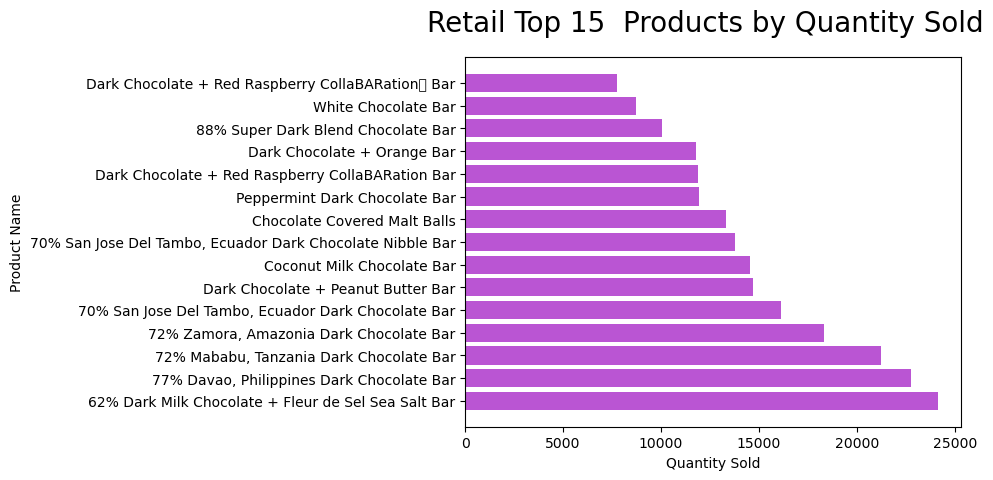

In [94]:
# Plotting top 15 products and # sold
plt.barh(y = custom_retail_counts['name'], width = custom_retail_counts['counts'], color = 'mediumorchid')
plt.suptitle('Retail Top 15  Products by Quantity Sold', fontsize=20)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name');

In [95]:
# Testing recommender system
get_recommendations(custom_retail, 'Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar')

,index,correlation
64,Dark Chocolate + Coffee CollaBARation Bar,0.141959
66,Dark Chocolate + Malted Milk CollaBARation Bar,0.114021
65,Dark Chocolate + Crunchy Sugar Crystals & Vani...,0.103474
69,Dark Chocolate + Red Raspberry CollaBARation Bar,0.098855
62,Dark Chocolate + Avocado & Rosemary CollaBARat...,0.069306


In [96]:
# Testing recommender system
get_recommendations(custom_retail, 'Chocolate Covered Malt Balls')

,index,correlation
215,Dark Chocolate + Malted Milk CollaBARation Bar,0.079052
66,Dark Chocolate + Malted Milk CollaBARation Bar,0.073105
53,Chocolate Covered S’more Bites,0.065618
112,"Peppermint Bark, Small Tin",0.064431
3,"Peppermint Bark, Small Tin",0.053660


In [97]:
# Testing recommender system
get_recommendations(custom_retail, '72% Zamora, Amazonia Dark Chocolate Bar')

,index,correlation
16,"72% Mababu, Tanzania Dark Chocolate Bar",0.228463
14,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.151942
21,"77% Davao, Philippines Dark Chocolate Bar",0.090331
15,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.088503
23,88% Super Dark Blend Chocolate Bar,0.068914


In [98]:
# Testing recommender system
get_recommendations(custom_retail, '77% Davao, Philippines Dark Chocolate Bar')

,index,correlation
14,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.120399
16,"72% Mababu, Tanzania Dark Chocolate Bar",0.108399
17,"72% Zamora, Amazonia Dark Chocolate Bar",0.090331
15,"70% San Jose Del Tambo, Ecuador Dark Chocolate...",0.074757
144,88% Super Dark Blend Chocolate Bar,0.062597


/var/folders/5y/3670bhfx50l7scp0w8_w5r6w0000gn/T/ipykernel_51535/1146507051.py:12: UserWarning: Glyph 132 (\x84) missing from current font.
  plt.savefig('../images/reatil_top_sellers.png', bbox_inches = 'tight')
/Users/scottaskinosie/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


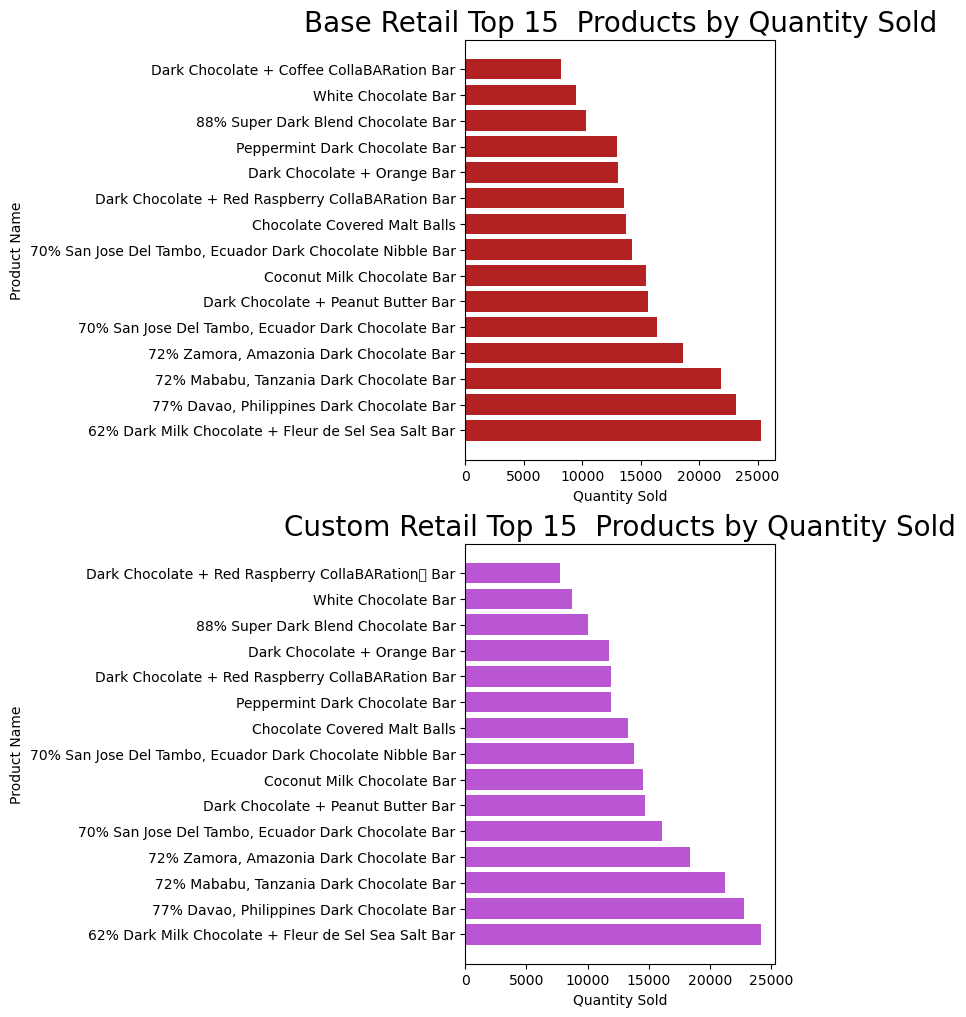

In [99]:
# Creating subplot with base and custom retail product quantities
fig, axes = plt.subplots(nrows=2, figsize=(4,12))
axes[0].barh(base_retail_top_15_plot['name'], base_retail_top_15_plot['qty_ordered'], color = 'firebrick') 
axes[1].barh(custom_retail_counts['name'], custom_retail_counts['counts'], color = 'mediumorchid')

axes[0].set_title('Base Retail Top 15  Products by Quantity Sold', fontsize=20)
axes[1].set_title('Custom Retail Top 15  Products by Quantity Sold', fontsize=20)
axes[0].set_xlabel('Quantity Sold')
axes[1].set_xlabel('Quantity Sold')
axes[0].set_ylabel('Product Name')
axes[1].set_ylabel('Product Name');
plt.savefig('../images/reatil_top_sellers.png', bbox_inches = 'tight')

In [100]:
# Counting number of top 15 products each has in common
# Creating lists of the top 15 words from each DF
df_1_list = []
df_2_list = []
for i in base_retail_top_15_plot['name']:
    df_1_list.append(i)
for i in custom_retail_counts['name']:
    df_2_list.append(i)
# Looping through both lists to find words present in both and returning the length
in_both = []
for i in df_1_list:
    if i in df_2_list:
        in_both.append(i) 
print(f' The base recommender and custom recommender share {len(in_both)} of the top 15 products in terms of quantity sold')

 The base recommender and custom recommender share 14 of the top 15 products in terms of quantity sold


In [101]:
# Creating a function to create a DF with side by side comparison of recommenders and save teh DF as an image
def create_labeled_recommender_df(df_1, df_2, product, df_image_name):
    br_1 = get_recommendations(df_1, product) # generating base recommdations
    br_1 = br_1.reset_index() # resetting index for concatenation
    br_1 = br_1.rename(columns={"name": "Base Recommendation System Product Suggestion"}) # renaming name column
    cr_1 = get_recommendations(df_2, product)# generating custom recommdations
    cr_1 = cr_1.rename(columns={"index": "Custom Recommendation System Product Suggestion"}) # renaming name column
    cr_1 = cr_1.reset_index() # resetting index for concatenation
    cr_br_1 = pd.concat([br_1, cr_1], axis = 1) # Concatanating dfs together
    cr_br_1 = cr_br_1.drop(['index'], axis = 1) # Dropping Indexes
    cr_br_1 = cr_br_1.style.set_caption(f"Recommendations based on your choice of {product}") # Labeling DF
    dfi.export(cr_br_1, f'../images/{df_image_name}.png') # Exporting df as an image
    return cr_br_1

In [102]:
# Creating image of base retail and custom retail recommenders
create_labeled_recommender_df(base_retail, custom_retail, '62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar', 'retail_1_62_dark_milk')

objc[51712]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa46d753f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x107f42220). One of the two will be used. Which one is undefined.
[0228/145434.484608:INFO:headless_shell.cc(107)] 155235 bytes written to file /var/folders/5y/3670bhfx50l7scp0w8_w5r6w0000gn/T/tmp4xzztuio/temp.png


,Base Recommendation System Product Suggestion,correlation,Custom Recommendation System Product Suggestion,correlation
0,Dark Chocolate + Coffee CollaBARation Bar,0.081692,White Chocolate Nibble Bar,0.082637
1,White Chocolate Nibble Bar,0.080833,Dark Chocolate + Coffee CollaBARation Bar,0.079591
2,Dark Chocolate + Coffee CollaBARation Bar,0.070498,Dark Chocolate + Coffee CollaBARation Bar,0.069547
3,"70% San Jose Del Tambo, Ecuador Dark Chocolate Bar",0.060828,"70% San Jose Del Tambo, Ecuador Dark Chocolate Bar",0.057055
4,Peppermint Dark Chocolate Bar,0.052322,Dark Chocolate + Orange Bar,0.050517


In [103]:
# Creating image of base retail and custom retail recommenders
create_labeled_recommender_df(base_retail, custom_retail, '77% Davao, Philippines Dark Chocolate Bar', 'retail_2_77_Davao')

objc[51725]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa46d753f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10f516220). One of the two will be used. Which one is undefined.
[0228/145436.374094:INFO:headless_shell.cc(107)] 183761 bytes written to file /var/folders/5y/3670bhfx50l7scp0w8_w5r6w0000gn/T/tmpvsx7r7q2/temp.png


,Base Recommendation System Product Suggestion,correlation,Custom Recommendation System Product Suggestion,correlation
0,"70% San Jose Del Tambo, Ecuador Dark Chocolate Bar",0.124625,"70% San Jose Del Tambo, Ecuador Dark Chocolate Bar",0.120399
1,"72% Mababu, Tanzania Dark Chocolate Bar",0.111779,"72% Mababu, Tanzania Dark Chocolate Bar",0.108399
2,"72% Zamora, Amazonia Dark Chocolate Bar",0.095422,"72% Zamora, Amazonia Dark Chocolate Bar",0.090331
3,"70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar",0.079324,"70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar",0.074757
4,88% Super Dark Blend Chocolate Bar,0.066312,88% Super Dark Blend Chocolate Bar,0.062597


In [104]:
# Creating image of base retail and custom retail recommenders
create_labeled_recommender_df(base_retail, custom_retail, 'Peppermint Dark Chocolate Bar', 'retail_10_peppermint_dark')

objc[51735]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa46d753f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x1114f1220). One of the two will be used. Which one is undefined.
[0228/145438.325265:INFO:headless_shell.cc(107)] 138791 bytes written to file /var/folders/5y/3670bhfx50l7scp0w8_w5r6w0000gn/T/tmp29aensgl/temp.png


,Base Recommendation System Product Suggestion,correlation,Custom Recommendation System Product Suggestion,correlation
0,Dark Chocolate + Peanut Butter Bar,0.163636,Dark Chocolate + Peanut Butter Bar,0.164854
1,Dark Chocolate + Orange Bar,0.127284,Dark Chocolate + Orange Bar,0.125405
2,Coconut Milk Chocolate Bar,0.087299,Coconut Milk Chocolate Bar,0.086076
3,Dark Chocolate + Red Raspberry CollaBARation Bar,0.073616,White Chocolate Bar,0.073851
4,White Chocolate Bar,0.072838,Dark Chocolate + Red Raspberry CollaBARation Bar,0.071370


### Looking at base recommendation system for wholesale orders that uses collaborative filtering to create recommendations. This, however, only uses order ID and not customer ID so it will not take into account customers that make multiple orders which should improve the recommendations based on the growing body of information of customer preferences. I will use this to compare against my custom model where I have included a way of including customer IDs and their preferences.

In [105]:
# Reading in wholesale DF
base_wholesale = pd.read_csv('../data/base_wholesale_no_email.csv', low_memory=False)
base_wholesale

,name,qty_ordered,order_id,store_id
0,Wholesale Mexican-Style Sipping Chocolate 170g...,6.0,50,2.0
1,Wholesale Tanzania Roasted Cocoa Nibs,12.0,50,2.0
2,Chocolate Tasting Kit,6.0,50,2.0
3,POP - Davao Bars,1.0,51,2.0
4,POP - Davao Dark Milk + Fleur de Sel Bar,1.0,51,2.0
...,...,...,...,...
42280,BULK Cocoa Nibs - kilo,10.0,#1029,2.0
42281,"POP - 72% Zamora, Amazonia Dark Chocolate Bar",1.0,#1027,2.0
42282,POP - Dark Chocolate + Red Raspberry CollaBARa...,1.0,#1026,2.0
42283,"POP - 70% San Jose Del Tambo, Ecuador Dark Cho...",1.0,#1025,2.0


In [106]:
# Looking at top retail products by sales
base_wholesale_top_15_plot = base_wholesale.groupby('name').agg(
    order_id=('order_id', 'nunique'),
    qty_ordered=('qty_ordered', 'sum')
).sort_values(by='qty_ordered', ascending=False).head(15)
    
base_wholesale_top_15_plot

,order_id,qty_ordered
name,,
Peppermint Bark WS - Small Box - 150g,497,11956.0
BULK Dark Chocolate Broken Bars - kilo,454,10456.0
BULK Cocoa Powder - kilo,561,7639.0
Chocolate Covered Malt Balls 150g,416,5394.0
POP - 62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,3696,4789.0
Peppermint Bark WS - Large Box - 300g,262,4320.0
Single Origin Natural Cocoa Powder 130g Tin,422,3978.0
"POP - 72% Mababu, Tanzania Dark Chocolate Bar",2406,3280.0
Single Origin Sipping Chocolate 170g Tin,268,2998.0


In [107]:
# Resetting index to plot 
base_wholesale_top_15_plot = base_wholesale_top_15_plot.reset_index()

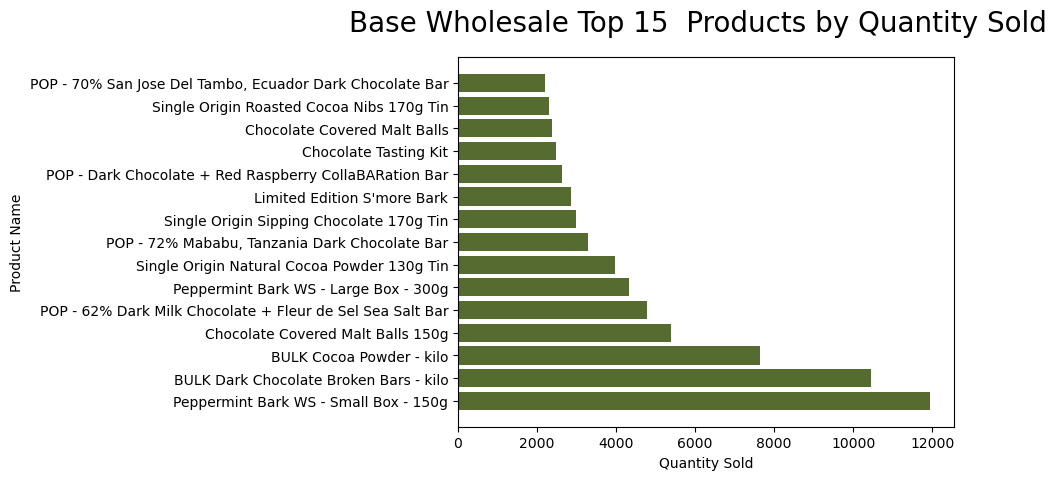

In [108]:
# Plotting top 15 products and # sold
plt.barh(y = base_wholesale_top_15_plot['name'], width = base_wholesale_top_15_plot['qty_ordered'], color = 'darkolivegreen')
plt.suptitle('Base Wholesale Top 15  Products by Quantity Sold', fontsize=20)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name');

In [109]:
# Creating pivot table for recommender system
base_wholesale = base_wholesale.pivot_table(index='order_id', columns=['name'], values='qty_ordered').fillna(0)
base_wholesale.head()

name,Wholesale Chalk-late Box,(White) Chocolate Covered Strawberry Bar,52% Dark Milk Chocolate + Goats Milk Mini Bar,52% Dark Milk Chocolate + Goat’s Milk,60% Dark Chocolate + Peanut Butter Bar,62% Dark Milk Chocolate + Fleur de Sel Sea Salt,62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,63% Dark Chocolate + Crushed Almonds & Vanilla,68% Dark Chocolate,68% Dark Chocolate Mini Bar,"70% CortÃ©s, Honduras Dark Chocolate Bar","70% Cortés, Honduras Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","72% Mababu, Tanzania Dark Chocolate Bar","72% Zamora, Amazonia Dark Chocolate Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA The Zeke Bar","77% Davao, Philippines Dark Chocolate Bar",77% Whiskey Dark Chocolate,A Lapsed Anarchist's Approach to Being a Better Leader,A Lapsed Anarchist's Approach to Building a Great Business,A Product of Change Tableya,A Year of Chocolate Collection,Askinosie Baggu Tote,Askinosie Bean-to-Bar Poster,Askinosie Chocolate Sticker,Askinosie Chocolate Trucker Hat,Askinosie Digital Gift Card,Askinosie Single Origin Box - None,BULK - HD Broken Bars - 1 kilo,BULK - TZ Powder - kilo,BULK Broken Bars,BULK Cocoa Nibs,BULK Cocoa Nibs - kilo,BULK Cocoa Nibs- TZ,BULK Cocoa Powder,BULK Cocoa Powder - kilo,BULK Cocoa Powder- Ecuador Blend,BULK Dark Chocolate Broken Bars,BULK Dark Chocolate Broken Bars - kilo,BULK Dark Milk Chocolate Broken Bars,BULK Dark Milk Chocolate Broken Bars - kilo,BULK Natural Cocoa Powder,BULK White Chocolate Broken Bars,BULK White Chocolate Broken Bars - kilo,Bestsellers: Chocolate Tasting Kit,Box O' (Mini) Chocolates,Bulk Morsels,Bulk Sample Kit,C-Ration-Month's Supply of Dark Chocolate,CASE - Askinosie Chocolate Hazelnut Spread,CASE Davao Natural Cocoa Powder,CASE Honduras Sipping Chocolate,CASE Mexican-Style Sipping Chocolate,CASE Single Origin Natural Cocoa Powder,CASE Single Origin Roasted Cocoa Nibs,CASE Single Origin Sipping Chocolate,CASE Tanzania Roasted Cocoa Nibs,Chalk-late Box,Chalk-late Box Four- 85g Dark Chocolate Bars,Chalk-late Box Four 85g Dark Chocolate Bars,Chalk-late Box Four- 85g Dark Chocolate Bars,Chalk-late Box-- Four Dark Chocolate Bars,Chocolate Covered Cherries & Hazelnuts,Chocolate Covered Cherries & Hazelnuts 200g,Chocolate Covered Malt Ball Tin,Chocolate Covered Malt Balls,Chocolate Covered Malt Balls 150g,Chocolate Covered Malt Balls Case (6 tins),Chocolate Covered S'more Bites 175g,Chocolate Covered S'more Bites Case (6 tins),Chocolate Covered Smore Bites,Chocolate Library,Chocolate Tasting Kit,Coconut Milk Chocolate Bar,CollaBARation Collection,Corduroy Olive Embroidered Cap,DON'T USE-- Wholesale Itty Bar Refill,Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar,Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar,Dark Chocolate + Coffee CollaBARation Bar,Dark Chocolate + Crunchy Sugar Crystals & Vanilla Bean CollaBARation Bar,Dark Chocolate + Crunchy Sugar Crystals & Vanilla Bean CollaBARation Bar,Dark Chocolate + Malted Milk CollaBARation Bar,Dark Chocolate + Malted Milk CollaBARation Bar,Dark Chocolate + Orange Bar,Dark Chocolate + Peanut Butter Bar,Dark Chocolate + Red Raspberry CollaBARation Bar,Dark Chocolate + Red Raspberry CollaBARation Bar,Dark Milk Chocolate + Ancho Chile & Pistachio CollaBARation Bar,Dark Milk Chocolate + Black Licorice CollaBARation Bar,Dark Milk Chocolate + Black Licorice CollaBARation Bar,Darks: Wholesale Chocolate Tasting Kit,Davao Itty Bar,Davao Natural Cocoa Powder 130g Tin,"Davao, Philippines Roasted Cocoa Nibs- 1lb",Del Tambo Itty Bar,Delivery Fee,Eat MO Chocolate T-Shirt,"Half Bar - 72% Mababu, Tanzania Dark Chocolate",Half Bar - 88% Super Dark Blend Chocolate Bar,Half Bar - Coconut Milk Chocolate,"Half Bar - Cort̩és, Honduras",Half Bar - Dark Chocolate + Avocado & Rosemary CollaBARation 

In [110]:
# Checking recommeder system
get_recommendations(base_wholesale, 'Peppermint Bark WS - Small Box - 150g')

,name,correlation
213,Peppermint Bark WS - Large Box - 300g,0.464721
211,POP Gingerbread Dark Chocolate Bar,0.219071
65,Chocolate Covered Malt Ball Tin,0.128743
54,CASE Single Origin Natural Cocoa Powder,0.011548
103,Half Bar - Coconut Milk Chocolate,0.006133


In [111]:
# Checking recommeder system
get_recommendations(base_wholesale, 'BULK Dark Chocolate Broken Bars - kilo')

,name,correlation
41,BULK Dark Milk Chocolate Broken Bars - kilo,0.065845
44,BULK White Chocolate Broken Bars - kilo,0.006477
253,Support Your Local Chocolate Maker T-Shirt,0.002776
36,BULK Cocoa Powder - kilo,0.000739
110,Half Bar - Davao Dark Milk + Fleur de Sel,-0.001057


In [112]:
# Checking recommeder system
get_recommendations(base_wholesale, 'BULK Cocoa Powder - kilo')

,name,correlation
39,BULK Dark Chocolate Broken Bars - kilo,0.000739
41,BULK Dark Milk Chocolate Broken Bars - kilo,0.000161
3,52% Dark Milk Chocolate + Goat’s Milk,-0.001167
7,63% Dark Chocolate + Crushed Almonds & Vanilla,-0.001167
8,68% Dark Chocolate,-0.001167


### Looking at product counts and reccomendations for wholesale dataframe that has been cleared of all orders without an email address. Email addresses were anonymized and if a customer had a subsequent order the identity was maintained in order to improve the pereformance of the recommender system.

In [113]:
# Reading in wholesale DF
custom_wholesale = pd.read_csv('../data/custom_wholesale_email_anon.csv', low_memory=False)
custom_wholesale

,email_anon,Wholesale Chalk-late Box,52% Dark Milk Chocolate + Goat’s Milk,62% Dark Milk Chocolate + Fleur de Sel Sea Salt,63% Dark Chocolate + Crushed Almonds & Vanilla,68% Dark Chocolate,"70% Cortés, Honduras Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","72% Mababu, Tanzania Dark Chocolate Bar","72% Zamora, Amazonia Dark Chocolate Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA The Zeke Bar","77% Davao, Philippines Dark Chocolate Bar",77% Whiskey Dark Chocolate,88% Super Dark Blend Chocolate Bar,A Lapsed Anarchist's Approach to Being a Better Leader,A Lapsed Anarchist's Approach to Building a Great Business,Askinosie Bean-to-Bar Poster,BULK - HD Broken Bars - 1 kilo,BULK - TZ Powder - kilo,BULK Cocoa Nibs,BULK Cocoa Nibs - kilo,BULK Cocoa Nibs- TZ,BULK Cocoa Powder,BULK Cocoa Powder - kilo,BULK Cocoa Powder- Ecuador Blend,BULK Dark Chocolate Broken Bars,BULK Dark Chocolate Broken Bars - kilo,BULK Dark Milk Chocolate Broken Bars,BULK Dark Milk Chocolate Broken Bars - kilo,BULK White Chocolate Broken Bars,BULK White Chocolate Broken Bars - kilo,Bulk Sample Kit,CASE - Askinosie Chocolate Hazelnut Spread,CASE Davao Natural Cocoa Powder,CASE Honduras Sipping Chocolate,CASE Mexican-Style Sipping Chocolate,CASE Single Origin Natural Cocoa Powder,CASE Single Origin Roasted Cocoa Nibs,CASE Single Origin Sipping Chocolate,CASE Tanzania Roasted Cocoa Nibs,Chalk-late Box,Chalk-late Box Four- 85g Dark Chocolate Bars,Chocolate Covered Cherries & Hazelnuts 200g,Chocolate Covered Malt Ball Tin,Chocolate Covered Malt Balls,Chocolate Covered Malt Balls 150g,Chocolate Covered S'more Bites 175g,Chocolate Tasting Kit,Coconut Milk Chocolate Bar,DON'T USE-- Wholesale Itty Bar Refill,Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar,Dark Chocolate + Coffee CollaBARation Bar,Dark Chocolate + Crunchy Sugar Crystals & Vanilla Bean CollaBARation Bar,Dark Chocolate + Malted Milk CollaBARation Bar,Dark Chocolate + Orange Bar,Dark Chocolate + Peanut Butter Bar,Dark Chocolate + Red Raspberry CollaBARation Bar,Dark Milk Chocolate + Ancho Chile & Pistachio CollaBARation Bar,Dark Milk Chocolate + Black Licorice CollaBARation Bar,Davao Itty Bar,Davao Natural Cocoa Powder 130g Tin,Del Tambo Itty Bar,Delivery Fee,Eat MO Chocolate T-Shirt,Half Bar - 88% Super Dark Blend Chocolate Bar,Half Bar - Coconut Milk Chocolate,"Half Bar - Cort̩és, Honduras",Half Bar - Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Half Bar - Dark Chocolate + Orange Bar,Half Bar - Dark Chocolate + Peanut Butter,Half Bar - Dark Chocolate + Red Raspberry,Half Bar - Davao,Half Bar - Davao Dark Milk + Fleur de Sel,Half Bar - Davao White Chocolate,Half Bar - Davao White Chocolate Nibble,Half Bar - Del Tambo,Half Bar - Del Tambo Nibble,Half Bar - Peppermint Dark Chocolate Bar,Half Bar - Super Dark 88% Dark Chocolate Bar,Half Bar - Tanzania,Half Bar - Zamora,Half Bar Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation,Half Bar Dark Chocolate + Coffee CollaBARation,Half Bar Dark Chocolate + Crunchy Sugar Crystals and Vanilla Bean,Half Bar Dark Chocolate + Malted Milk CollaBARation,Half Bar Dark Milk Chocolate + Ancho Chile & Pistachio CollaBARation,Half Bar Dark Milk Chocolate + Black Licorice CollaBARation,Half Bar Super Dark,Half Bar- Davao White Chocolate Pistachio,Handout - Askinosie Chocolate Hazelnut Spread itty Jar,"Hey, Hey Hazelnut! Chocolate Hazelnut Spread 6.5oz Jar",Honduras Itty Bar,Intelligentsia + Askinosie Shirt,Limited Edition S'More Bark WS,Limited Edition S'more Bark,"Meaningful Work, by Shawn Askinosie with Lawren Askinosie",POP - 62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,"POP - 70% Cortés, Honduras Dark Chocolate Bar","POP - 70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","POP - 70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","POP - 72% Mababu, Tanzania Dark Chocolate Bar",

In [114]:
# Creating a DF with counts for each item from retail DF
custom_wholesale_counts = custom_wholesale.drop(columns = ['email_anon'])
custom_wholesale_counts

,Wholesale Chalk-late Box,52% Dark Milk Chocolate + Goat’s Milk,62% Dark Milk Chocolate + Fleur de Sel Sea Salt,63% Dark Chocolate + Crushed Almonds & Vanilla,68% Dark Chocolate,"70% Cortés, Honduras Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","72% Mababu, Tanzania Dark Chocolate Bar","72% Zamora, Amazonia Dark Chocolate Bar","75% Ambanja, Madagascar Dark Chocolate Bar— AKA The Zeke Bar","77% Davao, Philippines Dark Chocolate Bar",77% Whiskey Dark Chocolate,88% Super Dark Blend Chocolate Bar,A Lapsed Anarchist's Approach to Being a Better Leader,A Lapsed Anarchist's Approach to Building a Great Business,Askinosie Bean-to-Bar Poster,BULK - HD Broken Bars - 1 kilo,BULK - TZ Powder - kilo,BULK Cocoa Nibs,BULK Cocoa Nibs - kilo,BULK Cocoa Nibs- TZ,BULK Cocoa Powder,BULK Cocoa Powder - kilo,BULK Cocoa Powder- Ecuador Blend,BULK Dark Chocolate Broken Bars,BULK Dark Chocolate Broken Bars - kilo,BULK Dark Milk Chocolate Broken Bars,BULK Dark Milk Chocolate Broken Bars - kilo,BULK White Chocolate Broken Bars,BULK White Chocolate Broken Bars - kilo,Bulk Sample Kit,CASE - Askinosie Chocolate Hazelnut Spread,CASE Davao Natural Cocoa Powder,CASE Honduras Sipping Chocolate,CASE Mexican-Style Sipping Chocolate,CASE Single Origin Natural Cocoa Powder,CASE Single Origin Roasted Cocoa Nibs,CASE Single Origin Sipping Chocolate,CASE Tanzania Roasted Cocoa Nibs,Chalk-late Box,Chalk-late Box Four- 85g Dark Chocolate Bars,Chocolate Covered Cherries & Hazelnuts 200g,Chocolate Covered Malt Ball Tin,Chocolate Covered Malt Balls,Chocolate Covered Malt Balls 150g,Chocolate Covered S'more Bites 175g,Chocolate Tasting Kit,Coconut Milk Chocolate Bar,DON'T USE-- Wholesale Itty Bar Refill,Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar,Dark Chocolate + Coffee CollaBARation Bar,Dark Chocolate + Crunchy Sugar Crystals & Vanilla Bean CollaBARation Bar,Dark Chocolate + Malted Milk CollaBARation Bar,Dark Chocolate + Orange Bar,Dark Chocolate + Peanut Butter Bar,Dark Chocolate + Red Raspberry CollaBARation Bar,Dark Milk Chocolate + Ancho Chile & Pistachio CollaBARation Bar,Dark Milk Chocolate + Black Licorice CollaBARation Bar,Davao Itty Bar,Davao Natural Cocoa Powder 130g Tin,Del Tambo Itty Bar,Delivery Fee,Eat MO Chocolate T-Shirt,Half Bar - 88% Super Dark Blend Chocolate Bar,Half Bar - Coconut Milk Chocolate,"Half Bar - Cort̩és, Honduras",Half Bar - Dark Chocolate + Avocado & Rosemary CollaBARation Bar,Half Bar - Dark Chocolate + Orange Bar,Half Bar - Dark Chocolate + Peanut Butter,Half Bar - Dark Chocolate + Red Raspberry,Half Bar - Davao,Half Bar - Davao Dark Milk + Fleur de Sel,Half Bar - Davao White Chocolate,Half Bar - Davao White Chocolate Nibble,Half Bar - Del Tambo,Half Bar - Del Tambo Nibble,Half Bar - Peppermint Dark Chocolate Bar,Half Bar - Super Dark 88% Dark Chocolate Bar,Half Bar - Tanzania,Half Bar - Zamora,Half Bar Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation,Half Bar Dark Chocolate + Coffee CollaBARation,Half Bar Dark Chocolate + Crunchy Sugar Crystals and Vanilla Bean,Half Bar Dark Chocolate + Malted Milk CollaBARation,Half Bar Dark Milk Chocolate + Ancho Chile & Pistachio CollaBARation,Half Bar Dark Milk Chocolate + Black Licorice CollaBARation,Half Bar Super Dark,Half Bar- Davao White Chocolate Pistachio,Handout - Askinosie Chocolate Hazelnut Spread itty Jar,"Hey, Hey Hazelnut! Chocolate Hazelnut Spread 6.5oz Jar",Honduras Itty Bar,Intelligentsia + Askinosie Shirt,Limited Edition S'More Bark WS,Limited Edition S'more Bark,"Meaningful Work, by Shawn Askinosie with Lawren Askinosie",POP - 62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,"POP - 70% Cortés, Honduras Dark Chocolate Bar","POP - 70% San Jose Del Tambo, Ecuador Dark Chocolate Bar","POP - 70% San Jose Del Tambo, Ecuador Dark Chocolate Nibble Bar","POP - 72% Mababu, Tanzania Dark Chocolate Bar","POP - 72% 

In [115]:
# Filtering for top 15 products
custom_wholesale_counts = custom_wholesale_counts.sum().sort_values(ascending = False)
custom_wholesale_counts = custom_wholesale_counts.to_frame(name = 'counts')
custom_wholesale_counts = custom_wholesale_counts[0:15]
custom_wholesale_counts

,counts
Peppermint Bark WS - Small Box - 150g,13824.0
BULK Dark Chocolate Broken Bars - kilo,13026.0
BULK Cocoa Powder - kilo,8699.0
Chocolate Covered Malt Balls 150g,7381.0
POP - 62% Dark Milk Chocolate + Fleur de Sel Sea Salt Bar,5953.0
Single Origin Natural Cocoa Powder 130g Tin,5141.0
Peppermint Bark WS - Large Box - 300g,4421.0
"POP - 72% Mababu, Tanzania Dark Chocolate Bar",4336.0
POP - Coconut Milk Chocolate Bar,4121.0
Single Origin Sipping Chocolate 170g Tin,3891.0


In [116]:
# Resetting index to plot
custom_wholesale_counts = custom_wholesale_counts.reset_index()
custom_wholesale_counts

,index,counts
0,Peppermint Bark WS - Small Box - 150g,13824.0
1,BULK Dark Chocolate Broken Bars - kilo,13026.0
2,BULK Cocoa Powder - kilo,8699.0
3,Chocolate Covered Malt Balls 150g,7381.0
4,POP - 62% Dark Milk Chocolate + Fleur de Sel S...,5953.0
5,Single Origin Natural Cocoa Powder 130g Tin,5141.0
6,Peppermint Bark WS - Large Box - 300g,4421.0
7,"POP - 72% Mababu, Tanzania Dark Chocolate Bar",4336.0
8,POP - Coconut Milk Chocolate Bar,4121.0
9,Single Origin Sipping Chocolate 170g Tin,3891.0


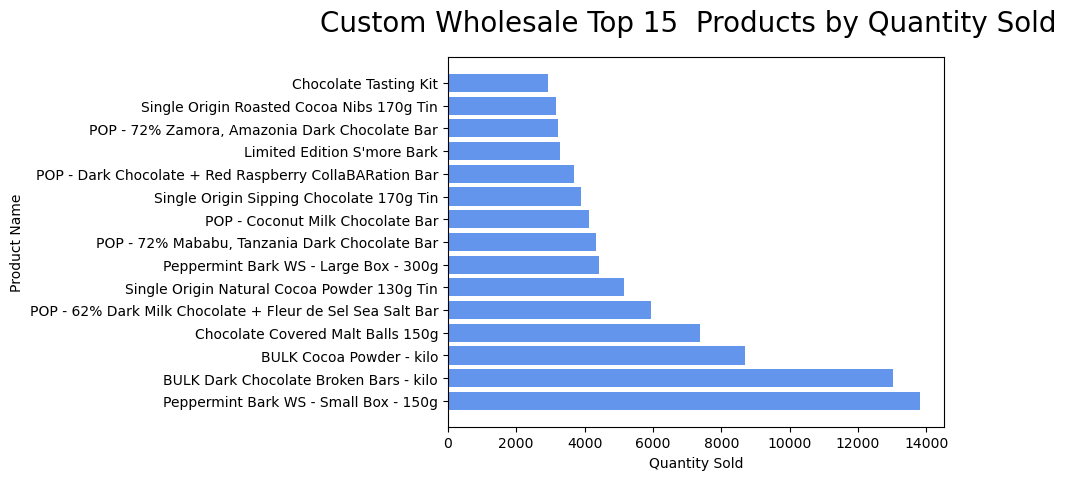

In [117]:
# Plotting top 15 products and # sold
plt.barh(y = custom_wholesale_counts['index'], width = custom_wholesale_counts['counts'], color = 'cornflowerblue')
plt.suptitle('Custom Wholesale Top 15  Products by Quantity Sold', fontsize=20)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name');

### The top products differ quite a bit between wholesale and retail. This makes sense as the retail website has an array of different items availabel for purchase and buying habits of retail comsumers differs quite a bit from wholesalers.

In [118]:
# Checking recommeder system
get_recommendations(custom_wholesale, 'Peppermint Bark WS - Small Box - 150g')

,index,correlation
143,Peppermint Bark WS - Large Box - 300g,0.593397
142,POP Gingerbread Dark Chocolate Bar,0.274914
44,Chocolate Covered Malt Ball Tin,0.195257
342,Wholesale C-Ration Month Supply of Chocolate,0.013781
256,Half Bar - Coconut Milk Chocolate,0.008865


In [119]:
# Checking recommeder system
get_recommendations(custom_wholesale, 'BULK Dark Chocolate Broken Bars - kilo')

,index,correlation
24,BULK Cocoa Powder - kilo,0.162565
29,BULK Dark Milk Chocolate Broken Bars - kilo,0.109059
250,Flavors: Wholesale Chocolate Tasting Kit,0.058443
295,POP - Fruit Punch Dark Chocolate Bar,0.052652
184,Wholesale Itty Bar Box,0.046081


In [120]:
# Checking recommeder system
get_recommendations(custom_wholesale, 'BULK Cocoa Powder - kilo')

,index,correlation
27,BULK Dark Chocolate Broken Bars - kilo,0.162565
0,email_anon,0.027401
310,Single Origin Natural Cocoa Powder Case (6 tins),0.015526
295,POP - Fruit Punch Dark Chocolate Bar,0.011442
21,BULK Cocoa Nibs - kilo,0.005625


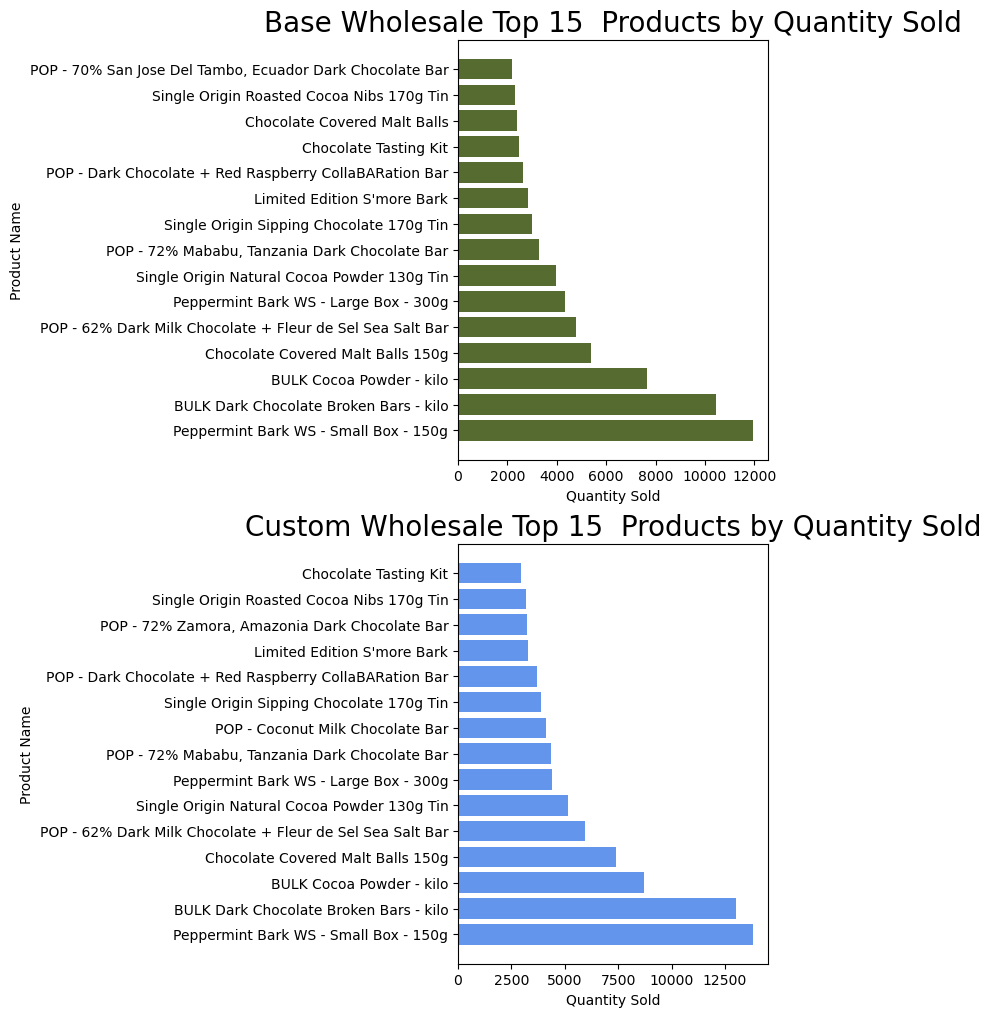

In [121]:
# Creating subplot with base and custom wholesale product quantities
fig, axes = plt.subplots(nrows=2, figsize=(4,12))
axes[0].barh(base_wholesale_top_15_plot['name'], base_wholesale_top_15_plot['qty_ordered'], color = 'darkolivegreen') 
axes[1].barh(custom_wholesale_counts['index'], custom_wholesale_counts['counts'], color = 'cornflowerblue')

axes[0].set_title('Base Wholesale Top 15  Products by Quantity Sold', fontsize=20)
axes[1].set_title('Custom Wholesale Top 15  Products by Quantity Sold', fontsize=20)
axes[0].set_xlabel('Quantity Sold')
axes[1].set_xlabel('Quantity Sold')
axes[0].set_ylabel('Product Name')
axes[1].set_ylabel('Product Name');
plt.savefig('../images/wholesale_top_sellers.png', bbox_inches = 'tight')

In [122]:
# Counting number of top 15 products each has in common
# Creating lists of the top 15 words from each DF
df_1_list = []
df_2_list = []
for i in base_wholesale_top_15_plot['name']:
    df_1_list.append(i)
for i in custom_wholesale_counts['index']:
    df_2_list.append(i)
# Looping through both lists to find words present in both and returning the length
in_both = []
for i in df_1_list:
    if i in df_2_list:
        in_both.append(i) 
print(f' The base recommender and custom recommender share {len(in_both)} of the top 15 products in terms of quantity sold')

 The base recommender and custom recommender share 13 of the top 15 products in terms of quantity sold


In [123]:
# Creating image of base retail and custom retail recommenders
create_labeled_recommender_df(base_wholesale, custom_wholesale, 'Peppermint Bark WS - Small Box - 150g', 'wholesale_1_Peppermint_small')

objc[51748]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa46d753f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x105834220). One of the two will be used. Which one is undefined.
[0228/145444.923584:INFO:headless_shell.cc(107)] 148811 bytes written to file /var/folders/5y/3670bhfx50l7scp0w8_w5r6w0000gn/T/tmp_x4gncs9/temp.png


,Base Recommendation System Product Suggestion,correlation,Custom Recommendation System Product Suggestion,correlation
0,Peppermint Bark WS - Large Box - 300g,0.464721,Peppermint Bark WS - Large Box - 300g,0.593397
1,POP Gingerbread Dark Chocolate Bar,0.219071,POP Gingerbread Dark Chocolate Bar,0.274914
2,Chocolate Covered Malt Ball Tin,0.128743,Chocolate Covered Malt Ball Tin,0.195257
3,CASE Single Origin Natural Cocoa Powder,0.011548,Wholesale C-Ration Month Supply of Chocolate,0.013781
4,Half Bar - Coconut Milk Chocolate,0.006133,Half Bar - Coconut Milk Chocolate,0.008865


In [124]:
# Creating image of base retail and custom retail recommenders
create_labeled_recommender_df(base_wholesale, custom_wholesale, 'BULK Dark Chocolate Broken Bars - kilo', 'wholesale_2_bulk_dark_chocolate')

objc[51758]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa46d753f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x10b0ac220). One of the two will be used. Which one is undefined.
[0228/145446.494229:INFO:headless_shell.cc(107)] 150865 bytes written to file /var/folders/5y/3670bhfx50l7scp0w8_w5r6w0000gn/T/tmp5zk616as/temp.png


,Base Recommendation System Product Suggestion,correlation,Custom Recommendation System Product Suggestion,correlation
0,BULK Dark Milk Chocolate Broken Bars - kilo,0.065845,BULK Cocoa Powder - kilo,0.162565
1,BULK White Chocolate Broken Bars - kilo,0.006477,BULK Dark Milk Chocolate Broken Bars - kilo,0.109059
2,Support Your Local Chocolate Maker T-Shirt,0.002776,Flavors: Wholesale Chocolate Tasting Kit,0.058443
3,BULK Cocoa Powder - kilo,0.000739,POP - Fruit Punch Dark Chocolate Bar,0.052652
4,Half Bar - Davao Dark Milk + Fleur de Sel,-0.001057,Wholesale Itty Bar Box,0.046081


In [125]:
# Creating image of base retail and custom retail recommenders
create_labeled_recommender_df(base_wholesale, custom_wholesale, 'Single Origin Sipping Chocolate 170g Tin', 'wholesale_10_single_origin_sipping')

objc[51769]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa46d753f0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.177/Libraries/libGLESv2.dylib (0x108a60220). One of the two will be used. Which one is undefined.
[0228/145448.181487:INFO:headless_shell.cc(107)] 177754 bytes written to file /var/folders/5y/3670bhfx50l7scp0w8_w5r6w0000gn/T/tmp8y9bqbt4/temp.png


,Base Recommendation System Product Suggestion,correlation,Custom Recommendation System Product Suggestion,correlation
0,Chocolate Covered Malt Balls 150g,0.327696,Chocolate Covered Malt Balls 150g,0.361084
1,Peppermint Bark WS - Large Box - 300g,0.098669,Peppermint Bark WS - Large Box - 300g,0.117077
2,POP Gingerbread Dark Chocolate Bar,0.090671,POP Gingerbread Dark Chocolate Bar,0.101738
3,POP - Dark Chocolate + Avocado & Rosemary CollaBARation Bar,0.080340,Single Origin Natural Cocoa Powder 130g Tin,0.085184
4,POP - Dark Chocolate + Coffee CollaBARation Bar,0.070567,POP - Dark Chocolate + Coconut Sugar & Toasted Coconut CollaBARation Bar,0.083891
